In [3]:
#Importation des Biblio

import numpy as np
np.set_printoptions (suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report


In [4]:
#Chargement de base

data=pd.read_csv('/content/Base.csv',sep=' ', header=(1))

In [5]:
#Afficher les 10 1ères lignes
data.head(10)

,21516.582000,44667.203900,115421.200200,240434.510500,440023.158200,759398.574100,1272766.366300,2064313.195200,3177107.477700,4545642.108600,...,91.680700,2531.009100,13725.789700,35564.343200,67071.024700,103836.816600,138710.154600,163735.368600,172710.974900,0.000000
0,66341.7319,76972.4981,111452.3341,175722.0050,2.773431e+05,4.333589e+05,6.952205e+05,1.181772e+06,2.086164e+06,3.613615e+06,...,5973.5464,181.8288,4581.9118,25717.3036,65286.2862,117270.0184,168814.3120,205029.8222,215274.0359,0.0
1,22476.6171,32388.9675,60336.8673,97908.6282,1.248140e+05,1.129392e+05,5.348791e+04,7.307897e+03,1.487606e+05,7.504049e+05,...,4740.4096,10316.5948,19566.1880,32205.5605,47350.3607,63378.6379,77929.7322,88280.8738,92123.6120,0.0
2,4044.1830,2097.4077,4693.8220,36540.7549,1.336515e+05,3.289613e+05,6.300081e+05,9.998012e+05,1.355202e+06,1.589637e+06,...,1390.8140,1824.2789,1452.2761,586.5759,100.7999,716.2042,2342.3627,4042.4916,4705.5865,0.0
3,22604.0750,34253.1060,78658.4935,183111.5509,3.875203e+05,7.315302e+05,1.233566e+06,1.867248e+06,2.545874e+06,3.127818e+06,...,6886.5780,12523.7923,19833.9861,28158.4121,36542.7347,43982.7186,49646.1652,52987.3095,53749.9457,0.0
4,21045.2128,37950.6176,89533.9553,169855.6180,2.481682e+05,2.670043e+05,1.896730e+05,9.726277e+04,2.649468e+05,1.108486e+06,...,295.1538,455.4406,671.8252,901.9835,1098.8371,1251.1999,1384.6284,1517.1457,1620.3564,0.0
5,1657.3833,61.7219,14340.6823,104372.0418,3.710113e+05,9.368764e+05,1.898126e+06,3.259715e+06,4.889464e+06,6.530019e+06,...,7.4501,8.1534,18.8379,23.6324,15.3439,5.4855,8.3211,20.9907,27.0657,0.0
6,3368.6451,3592.2737,59218.7334,312612.3409,9.319198e+05,2.029150e+06,3.588733e+06,5.439074e+06,7.284062e+06,8.784240e+06,...,66.8939,29.8034,13.7023,36.1402,88.0852,147.2398,200.0668,245.2710,278.0043,0.0
7,26833.8860,63134.4729,257819.9441,873399.9962,2.330096e+06,5.085033e+06,9.364433e+06,1.482776e+07,2.038705e+07,2.442201e+07,...,3115.8866,6546.7377,12631.8815,21355.5426,31604.1077,41507.5336,49278.3727,53845.0249,54851.0424,0.0
8,9189.2467,66033.7821,266259.5343,714701.2317,1.625082e+06,3.330417e+06,6.213302e+06,1.052693e+07,1.615716e+07,2.245975e+07,...,82495.0322,120375.3306,175730.1143,249633.1153,338338.7230,432057.7877,515944.5314,573607.8844,592144.5182,0.0
9,23111.5512,30428.1878,49521.6032,70606.7588,7.760404e+04,5.945018e+04,3.440102e+04,7.215444e+04,2.847994e+05,7.690632e+05,...,7841.7228,13864.8170,23207.4405,36004.1508,51314.9966,67077.4106,80569.8699,89211.2209,91338.9393,0.0


In [6]:
# infromation of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Columns: 322 entries, 21516.582000 to 0.000000
dtypes: float64(322)
memory usage: 8.8 MB
None


In [7]:
print('Shape of Dataset:',data.shape)
print('Number of rows:',data.shape[0])
print('Number of columns : ',data.shape[1])

Shape of Dataset: (3598, 322)
Number of rows: 3598
Number of columns :  322


In [8]:
# checking for null value 
print("is there any null value :",data.isnull().values.any())

is there any null value : False


In [9]:
data.describe()

,21516.582000,44667.203900,115421.200200,240434.510500,440023.158200,759398.574100,1272766.366300,2064313.195200,3177107.477700,4545642.108600,...,91.680700,2531.009100,13725.789700,35564.343200,67071.024700,103836.816600,138710.154600,163735.368600,172710.974900,0.000000
count,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,...,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3598.000000
mean,1.171894e+06,1.273386e+06,1.574855e+06,2.070603e+06,2.759920e+06,3.653075e+06,4.768597e+06,6.118193e+06,7.683038e+06,9.392830e+06,...,8.902626e+03,1.127873e+04,1.533843e+04,2.162066e+04,3.017366e+04,4.014481e+04,4.971930e+04,5.660340e+04,5.890739e+04,0.272929
std,7.556232e+06,7.583755e+06,7.840813e+06,8.578006e+06,9.810898e+06,1.144968e+07,1.345362e+07,1.583210e+07,1.860261e+07,2.167203e+07,...,6.193012e+04,7.654518e+04,1.017956e+05,1.373418e+05,1.831454e+05,2.375467e+05,2.928591e+05,3.354488e+05,3.521522e+05,0.470416
min,1.480000e-02,5.872900e+00,1.006027e+02,4.568820e+01,1.539346e+02,1.135527e+02,1.500209e+02,3.631578e+02,3.123163e+02,3.224819e+02,...,3.920000e-02,1.550000e-02,1.561000e-01,6.586000e-01,2.740000e-02,1.481000e-01,2.230000e-01,3.718300e+00,9.917000e-01,0.000000
25%,1.004928e+04,3.166373e+04,7.902050e+04,1.680742e+05,2.807818e+05,4.079328e+05,5.319674e+05,6.974253e+05,9.359549e+05,1.256345e+06,...,2.072134e+02,2.018498e+02,2.119770e+02,2.541155e+02,4.017436e+02,6.385327e+02,8.934555e+02,1.106013e+03,1.147857e+03,0.000000
50%,6.792311e+04,1.272266e+05,2.673497e+05,5.192075e+05,8.451065e+05,1.228786e+06,1.671133e+06,2.183593e+06,2.732234e+06,3.480060e+06,...,8.885280e+02,9.789750e+02,1.211308e+03,1.560921e+03,2.324349e+03,3.343360e+03,4.414033e+03,5.050194e+03,5.301405e+03,0.000000
75%,6.026420e+05,7.306395e+05,1.058165e+06,1.546058e+06,2.235219e+06,3.141571e+06,4.389168e+06,6.024560e+06,7.477858e+06,9.296114e+06,...,4.220525e+03,5.359304e+03,6.969233e+03,1.003482e+04,1.391438e+04,1.903103e+04,2.363860e+04,2.725609e+04,2.839647e+04,1.000000
max,3.215172e+08,3.112352e+08,2.819806e+08,2.382507e+08,2.341321e+08,2.651344e+08,2.942489e+08,3.564233e+08,4.810619e+08,6.235253e+08,...,1.752914e+06,2.807571e+06,4.145090e+06,5.595592e+06,6.873093e+06,7.652316e+06,7.988904e+06,9.992543e+06,1.127103e+07,2.000000


In [10]:
# Missing values (éviter les NaN)
data.isnull().sum()
data.isna().sum()

21516.582000     0
44667.203900     0
115421.200200    0
240434.510500    0
440023.158200    0
                ..
103836.816600    0
138710.154600    0
163735.368600    0
172710.974900    0
0.000000         0
Length: 322, dtype: int64

In [11]:
#Convert the data into an array
dataset = data.values
dataset

array([[ 66341.7319,  76972.4981, 111452.3341, ..., 205029.8222,
        215274.0359,      0.    ],
       [ 22476.6171,  32388.9675,  60336.8673, ...,  88280.8738,
         92123.612 ,      0.    ],
       [  4044.183 ,   2097.4077,   4693.822 , ...,   4042.4916,
          4705.5865,      0.    ],
       ...,
       [258256.6851, 236853.4525, 205626.2906, ...,    363.2694,
           376.4815,      0.    ],
       [115193.7837, 173024.6757, 379576.133 , ...,    337.7571,
           299.85  ,      0.    ],
       [405489.1584, 422709.9614, 495790.9409, ...,    301.076 ,
           381.2578,      0.    ]])

In [12]:
#Split the dataset into independent and dependent datasets

X = dataset[:, 0:321] #Get all the rows from columns [1,321] (Features)
Y = dataset[:,321] #Get all the rows from last column (Target)

In [13]:
#Normalization
#Use the min-maxScaler method from preprocessing which scales the dataset so that all
#the features lie between 0 and 1 inclusive

min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.00020634, 0.00024729, 0.00039489, ..., 0.02113107, 0.02051792,
        0.01909968],
       [0.00006991, 0.00010405, 0.00021362, ..., 0.00975472, 0.00883431,
        0.0081734 ],
       [0.00001258, 0.00000672, 0.00001629, ..., 0.00029317, 0.00040418,
        0.00041741],
       ...,
       [0.00080324, 0.00076099, 0.00072886, ..., 0.00003461, 0.00003598,
        0.00003331],
       [0.00035828, 0.00055591, 0.00134575, ..., 0.00003997, 0.00003343,
        0.00002652],
       [0.00126117, 0.00135815, 0.00175789, ..., 0.0000267 , 0.00002976,
        0.00003374]])

In [14]:
#split the data into 80% training and 20% (testing (10%) and validating (10%))

X_train, X_val_test, Y_train, Y_val_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5)


In [15]:
#Vérifier le chargement des données

#The training set has 2878 data points while the validation and test set have 360 data points each.
#The X variables have 321 input features
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(2878, 321) (360, 321) (360, 321) (2878,) (360,) (360,)


In [16]:
from collections import Counter
histogram=Counter(Y)
print(histogram) #donne un dict contennant le nbre d occurences de 0 et 1 cle et


Counter({0.0: 2657, 1.0: 900, 2.0: 41})


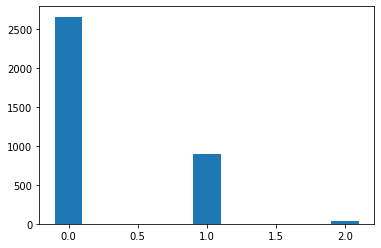

In [17]:
plt.bar(histogram.keys(),histogram.values(), 0.2)
plt.show()
#afficer le nbre d instance de la colonne Y

In [18]:
inter=np.sum(Y==0)/len(Y) #len: total
pre=np.sum(Y==1)/len(Y)
ictal=np.sum(Y==2)/len(Y)
#moyenne de nbr des y
print('interictal : {0:.3f} et preictal : {1:.3f} et ictal : {2:.3f}'.format(inter,pre,ictal))
#0: la premiere variable et 1 la deuxieme variable 3f: :3chiffres apres la virgule

interictal : 0.738 et preictal : 0.250 et ictal : 0.011


# **MLP classsifier**

In [19]:
#Utiliser l'algorithme de RESEAUX DE NEURONES MULTICOUCHES pour faire notre ML

In [20]:
from sklearn.neural_network import MLPClassifier
model =MLPClassifier(hidden_layer_sizes=(20,10),alpha=0.001, max_iter=200)


In [21]:
# Train model
model.fit(X_train, Y_train) 

MLPClassifier(alpha=0.001, hidden_layer_sizes=(20, 10))

In [22]:
#test model
prediction = model.predict(X_test)
print(prediction)

[0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.

In [23]:
#Predict probabilities
proba = model.predict_proba(X_test)
proba = np.asarray(proba)
proba

array([[0.93698755, 0.06158253, 0.00142992],
       [0.99997728, 0.00001947, 0.00000325],
       [0.99905972, 0.00035966, 0.00058061],
       ...,
       [0.99942213, 0.00038771, 0.00019016],
       [0.99063831, 0.0077953 , 0.0015664 ],
       [0.90165701, 0.00867531, 0.08966767]])

In [24]:
accuracies =  {} 
model_accuracy = model.score(X_test,Y_test)
accuracies['MLPClassifier'] = model_accuracy
print("Testing Accuracty of MLPClassifier Model : ",model_accuracy)

Testing Accuracty of MLPClassifier Model :  0.8361111111111111


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction)
cm

array([[251,  26,   1],
       [ 32,  48,   0],
       [  0,   0,   2]])

# **SVM**

In [26]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(1,kernel_regularizer=l2(0.1)))
model.add(Activation('softmax'))
model.compile(loss='squared_hinge',
              optimizer='adadelta',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10)
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
90/90 [==============================] - 2s 3ms/step - loss: 2.3834 - accuracy: 0.2484
Epoch 2/10
90/90 [==============================] - 0s 3ms/step - loss: 2.4779 - accuracy: 0.2484
Epoch 3/10
90/90 [==============================] - 0s 4ms/step - loss: 2.4651 - accuracy: 0.2484
Epoch 4/10
90/90 [==============================] - 0s 4ms/step - loss: 2.5378 - accuracy: 0.2484
Epoch 5/10
90/90 [==============================] - 0s 4ms/step - loss: 2.4113 - accuracy: 0.2484
Epoch 6/10
90/90 [==============================] - 0s 4ms/step - loss: 2.4110 - accuracy: 0.2484
Epoch 7/10
90/90 [==============================] - 0s 3ms/step - loss: 2.4992 - accuracy: 0.2484
Epoch 8/10
90/90 [==============================] - 0s 3ms/step - loss: 2.3936 - accuracy: 0.2484
Epoch 9/10
90/90 [==============================] - 0s 2ms/step - loss: 2.3754 - accuracy: 0.2484
Epoch 10/10
90/90 [==============================] - 0s 3ms/step - loss: 2.4720 - accuracy: 0.2484
12/12 - 0s - loss: 

In [28]:
#Calculer les valeurs loss et précision pour la base de test

score = model.evaluate(X_test, Y_test, verbose=1, batch_size=32)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

12/12 [==============================] - 0s 2ms/step - loss: 2.8702 - accuracy: 0.2222
Test loss:  2.8701822757720947
Test accuracy:  0.2222222238779068


In [29]:
#Make a prediction
#La génération de prédictions sur de nouvelles données est toute aussi simple :

prediction = model.predict(X_test)
print(prediction)
print(Y_test)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [30]:
model.predict(X_train[1:2], batch_size=None, verbose=0, steps=None)

array([[1.]], dtype=float32)

In [32]:
Y_train[1:2]

array([0.])

In [ ]:
import tensorflow as tf

# Create a converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Convert the model
tflite_model = converter.convert()
# Create the tflite model file
tflite_model_name = "mymodelSVM.tflite"
open(tflite_model_name, "wb").write(tflite_model)
# Set quantize to true 
converter.post_training_quantize=True